# Image Processing SS 2022 - Assignment - 01

### Deadline is 28.04.2022 at 12:00 p.m.

Please solve the assignments together with a partner. Write the names of yourself and your partner and a link to your repository in a text-submission in the Whiteboard. You have to do this EVERY WEEK.
I will run every notebook. Make sure the code runs without errors, when clicking `Kernel` -> `Restart & Run All`.


## Introduction to Python / Numpy

* [Learn Python in 15 minutes](https://learnxinyminutes.com/docs/python3/): We will use Python 3.
* [Numpy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#general-purpose-equivalents)
* [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Libraries

We will use the following libraries:

* matplotlib
* numpy
* scipy
* skimage


# Exercise 0 - Setup Development Enviroment - [1 Point]

Find a partner, follow the steps in the [README](https://github.com/BildverarbeitungSoSe22/Hausaufgaben/blob/master/README.md) and paste a link to your repository and your names into the KVV assignment box. Also include your names inside your solution.
You do not need to upload any files to MyCampus Whiteboard. I will clone your repository.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [3]:
from skimage.data import astronaut

In [4]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


We have a `(512, 512, 3)` array of unsigned bytes. At `img[x, y]` there are three values for R,G and B.

We will always work with floating point arrays between 0 and 1. 

In [5]:
img = img / 255.

Lets display the image.

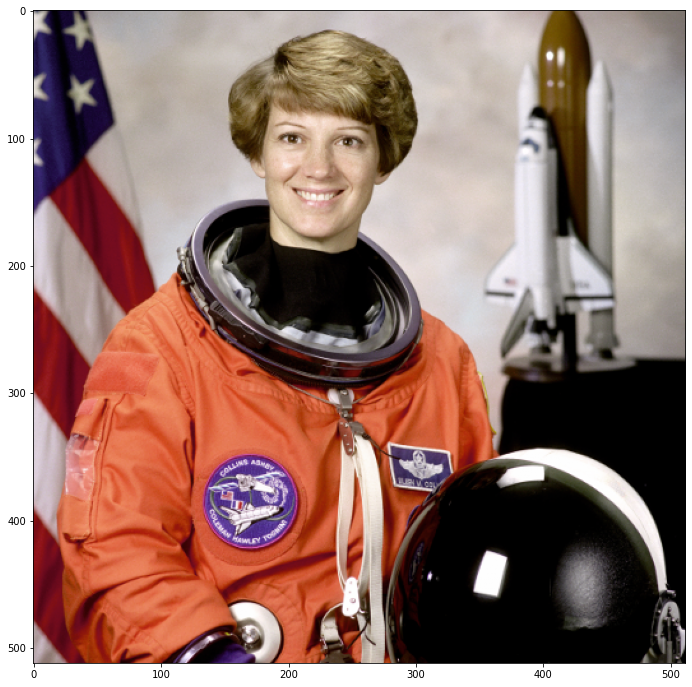

In [6]:
plt.imshow(img)
plt.show()

This is [Eileen Collins](https://en.wikipedia.org/wiki/Eileen_Collins). She was the first astronaut 
 to fly the Space Shuttle through a complete 360-degree pitch maneuver. What an inspiring woman.

## Exercise 1 - Plot -       [3 Points]

Plot the R, G and B channels separately.

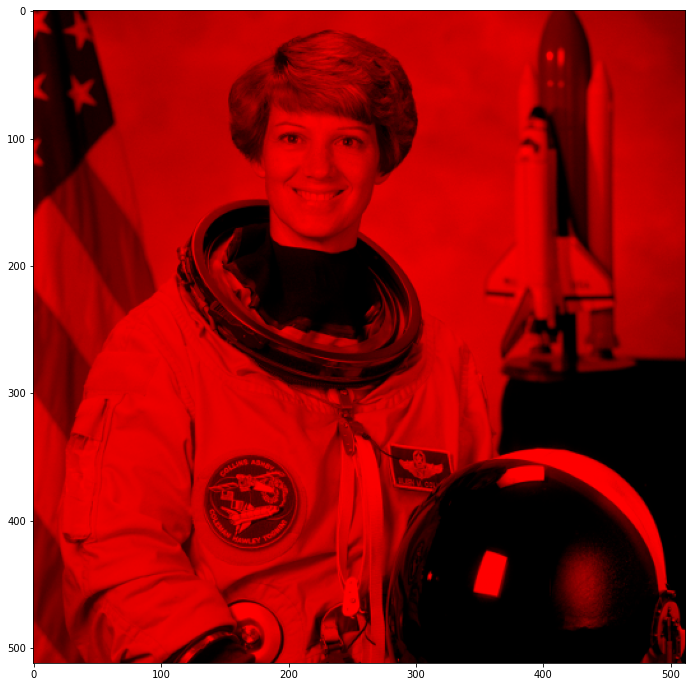

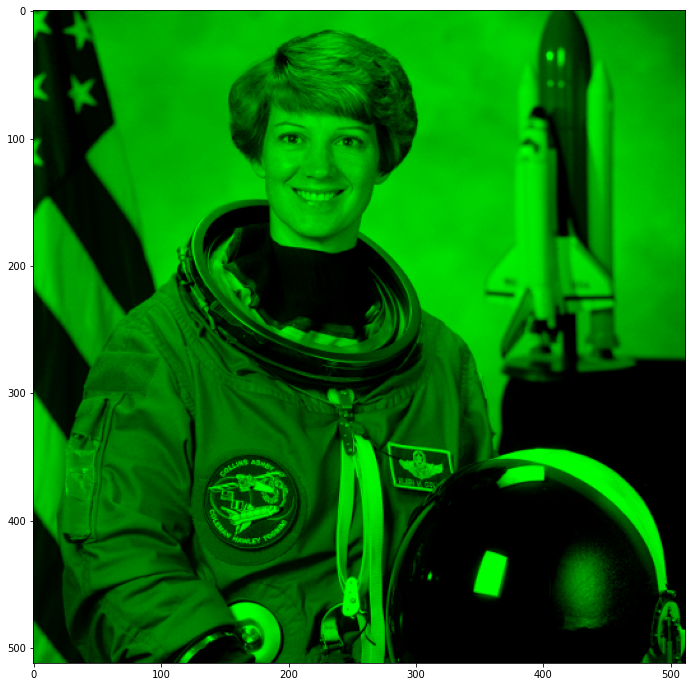

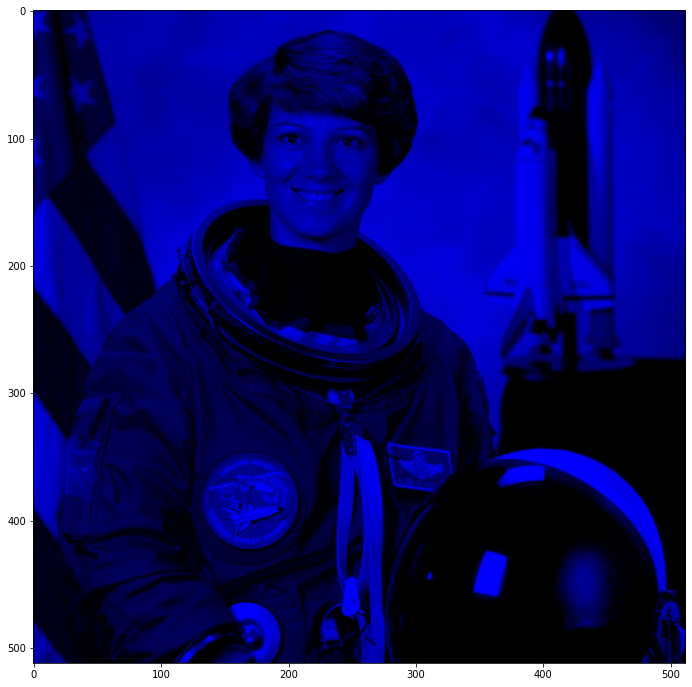

In [7]:
img_R = np.zeros(img.shape)
img_R[:,:,0] = img[:,:,0]
plt.imshow(img_R)
plt.show()
img_G = np.zeros(img.shape)
img_G[:,:,1] = img[:,:,1]
plt.imshow(img_G)
plt.show()
img_B = np.zeros(img.shape)
img_B[:,:,2] = img[:,:,2]
plt.imshow(img_B)
plt.show()

## Exercise 2 - XYZ to xy [3 Points]

Implement the `XYZ_to_xy` function where x and y indicate the chromaticity of a color. x shall be calculated as X / (X+Y+Z) and y as Y / (X+Y+Z).


In [8]:
def XYZ_to_xy(x):
    """
    Converts the numpy array `x` from XYZ to xy.
    """
    y = np.zeros(img.shape)
    y[:,:,:] = x[:,:,:]
    for i in y:
        for j in i:
            z = (j[0]+j[1]+j[2])
            if z != 0:
                j[0] = j[0]/z
                j[1] = j[1]/z
            j[2] = 0
    return y

Plot the image and its new x and y components.

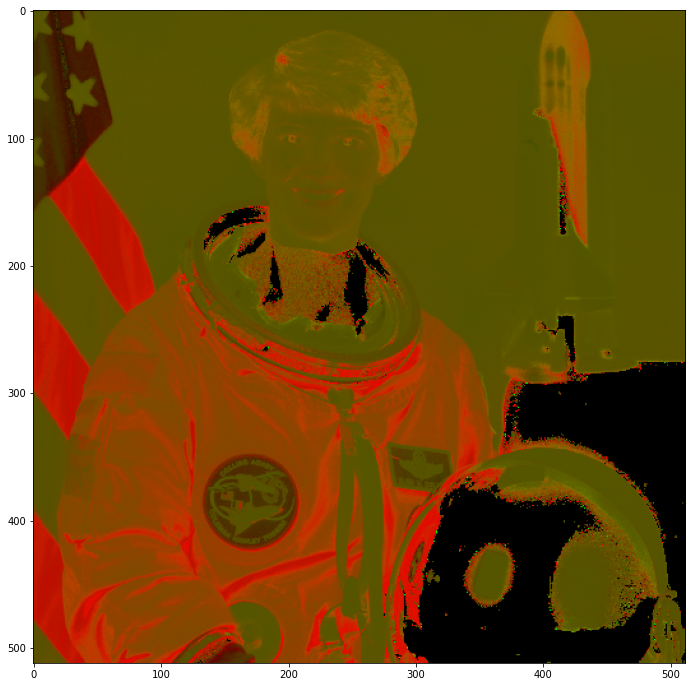

In [9]:
img_as_xy = XYZ_to_xy(img)
plt.imshow(img_as_xy)
plt.show()

## Exercise 3 - Calculation [3 Points]

In the figure below you can see the [CIE-XYZ](https://de.wikipedia.org/wiki/CIE-Normvalenzsystem) color space.
![](https://upload.wikimedia.org/wikipedia/commons/4/49/CIE-Normfarbtafel.png)

What are the approximate x,y,z values for the following Adobe RGB colors:
* `(0, 0.5, 0.5)` -> `(0.17, 0.38, 0.45)`
* `(0.33, 0.33, 0.33)` -> `(0.33, 0.33, 0.33)`

A sodium-vapor lamp shines with double the intensity of a mercury-vapor lamp
. The light from the sodium lamp only contains 
the spectral line at `589,00nm` and the light from the mercury lamp only the
spectral line at `435,83 nm`.

What color does a human experience? What are the approximate x,y,z values?
`(0.42, 0.38, 0.2)`